We are going to simulate the Hoeffding Inequality by demonstrating how the average of any given sample has the probability of being within the error bound defined by Hoeffding Inequality.

By the Law of Large Numbers, we know that the distribution of means of i.i.d. random samples approximates a normal distribution.  bla bla bla hers a demo.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
Bin = np.random.rand(50000,100) #50000 samples of sample size N = 100

In [5]:
#Generate a Population of random values 0 < x < 1, declare if x>= 0.5 then x =1 

for sample in Bin:
    for record_index in range(len(sample)):
        if sample[record_index] >= 0.5:
            sample[record_index] = 1
        else:
            sample[record_index] = 0

In [6]:
Binomial_Bin = [np.round(sample) for sample in Bin]

In [7]:
means = [np.mean(sample) for sample in Binomial_Bin]

In [8]:
from matplotlib.lines import Line2D
from matplotlib.axes import Axes

In [13]:
epsilon = 0.1
x_ticks = [i/10 for i in range(11)]

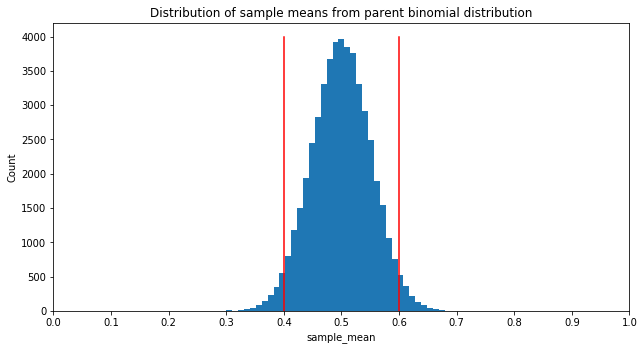

In [15]:
Hoeff_lower_bound_markers_x = [0.5 - epsilon, 0.5 - epsilon]
Hoeff_lower_bound_markers_y = [0,4000]

Hoeff_upper_bound_markers_x = [0.5 + epsilon, 0.5 + epsilon]
Hoeff_upper_bound_markers_y = [0,4000]

fig = plt.figure(figsize=(10,5))
ax = Axes(fig, [.1,.1,.8,.8])
fig.add_axes(ax)
lower_bound_line = Line2D(Hoeff_lower_bound_markers_x,Hoeff_lower_bound_markers_y, color = "red")
upper_bound_line = Line2D(Hoeff_upper_bound_markers_x,Hoeff_upper_bound_markers_y, color = "red")
ax.add_line(lower_bound_line)
ax.add_line(upper_bound_line)
plt.hist(means, bins = 41)
plt.xticks(x_ticks)
plt.xlabel('sample_mean')
plt.ylabel('Count')
plt.title('Distribution of sample means from parent binomial distribution')

plt.show()

In [28]:
#Hoeffding Equation

# Recall that the Hoeffding Inequality provides us with an upper bound on the probability
# [that a given sample distribution of sample size N will deviate from its parent by more than chosen epsilon]

def hoeffding(parent_p, epsilon, N):
    
    prob_of_deviation = 2 * np.exp(-2 * epsilon**2 * N)
    return prob_of_deviation

In [35]:
# Our sample size is N = 100
# What is the probability that a given sample's distribution (sample_p) will deviate from parent_p by more than 0.1?

p1= 0.5;
e1 = 0.1;
N1 = 100;

prob_of_deviation = hoeffding(parent_p = p1, epsilon = e1, N = N1)
print(prob_of_deviation)

0.270670566473


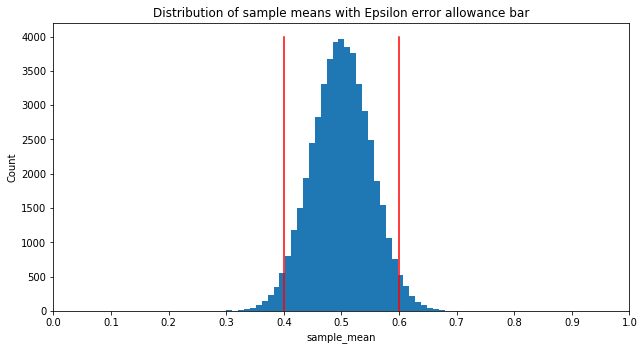

In [16]:
Hoeff_lower_bound_markers_x = [0.5 - epsilon, 0.5 - epsilon]
Hoeff_lower_bound_markers_y = [0,4000]

Hoeff_upper_bound_markers_x = [0.5 + epsilon, 0.5 + epsilon]
Hoeff_upper_bound_markers_y = [0,4000]

fig = plt.figure(figsize=(10,5))
ax = Axes(fig, [.1,.1,.8,.8])
fig.add_axes(ax)
lower_bound_line = Line2D(Hoeff_lower_bound_markers_x,Hoeff_lower_bound_markers_y, color = "red")
upper_bound_line = Line2D(Hoeff_upper_bound_markers_x,Hoeff_upper_bound_markers_y, color = "red")
ax.add_line(lower_bound_line)
ax.add_line(upper_bound_line)
plt.hist(means, bins = 41)
plt.xticks(x_ticks)
plt.xlabel('sample_mean')
plt.ylabel('Count')
plt.title('Distribution of sample means with Epsilon error allowance bar')

plt.show()

In [37]:
prob_beyond_epsilon = sum([1 for x in means if x > (p1 + e1) or x < (p1 - e1)])/50000;
print(prob_beyond_epsilon)

0.03556


In [34]:
p1

0.1